In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Neste notebook, iremos demonstrar algumas medidas da estatística descritiva com os dados do Airbnb referentes à cidade do Rio de Janeiro. Antes de começar a discutir as medidas iremos conhecer o conjunto de dados e fazer um breve tratamento.

In [2]:
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-02-22/visualisations/listings.csv")

#### Dicionário das variáveis
   - id - número de id gerado para identificar o imóvel
   - name - nome da propriedade anunciada
   - host_id - número de id do proprietário (anfitrião) da propriedade
   - host_name - Nome do anfitrião
   - neighbourhood_group - esta coluna não contém nenhum valor válido
   - neighbourhood - nome do bairro
   - latitude - coordenada da latitude da propriedade
   - longitude - coordenada da longitude da propriedade
   - room_type - informa o tipo de quarto que é oferecido
   - price - preço para alugar o imóvel
   - minimum_nights - quantidade mínima de noites para reservar
   - number_of_reviews - número de reviews que a propriedade possui
   - last_review - data do último review
   - reviews_per_month - quantidade de reviews por mês
   - calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
   - availability_365 - número de dias de disponibilidade dentro de 365 dias

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,221,5,260,2021-02-08,2.01,1,304
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,10
2,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.82,11,328
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.02,1,207
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,353,2021-02-10,2.79,1,101


#### Analisando estrutura do Dataset

In [4]:
print(f"Quantidade de registros: {df.shape[0]}")
print("---------------------------------------")
print(f"Quantidade de variáveis: {df.shape[1]}")
print("---------------------------------------")
print(df.info())

Quantidade de registros: 26615
---------------------------------------
Quantidade de variáveis: 16
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26615 entries, 0 to 26614
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26615 non-null  int64  
 1   name                            26586 non-null  object 
 2   host_id                         26615 non-null  int64  
 3   host_name                       26591 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26615 non-null  object 
 6   latitude                        26615 non-null  float64
 7   longitude                       26615 non-null  float64
 8   room_type                       26615 non-null  object 
 9   price                           26615 non-null  int64  
 10  minimum_nights 

#### Verificando a porcenteagem de valores nulos por variável

In [5]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.374150
last_review                       0.374150
name                              0.001090
host_name                         0.000902
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Note que a variável "neighbourhood_group" não possui valor em nenhuma dos registros, com o objetivo de reduzir o número de variáveis vamos removê-la do nosso conjunto. Além disso, temos alguns imóveis que não tiveram avaliação.

In [6]:
df = df.drop(["neighbourhood_group"], axis=1)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Verificando se há algum registro com o preço zerado:

In [7]:
df[df["price"] == 0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22101,43036115,Rio Design Hotel,311180109,Rio Design,Copacabana,-22.98298,-43.19063,Hotel room,0,1,0,NaN,NaN,1,0
22102,43036122,Belga Hotel e Restaurante Ltda,286416585,Belga,Centro,-22.90133,-43.18280,Hotel room,0,1,0,NaN,NaN,1,0
22156,43133883,Arena Copacabana Hotel,313782664,Arena Copacabana,Copacabana,-22.96906,-43.18171,Hotel room,0,1,0,NaN,NaN,1,0
22161,43148322,Américas Barra Hotel & Eventos,315032561,Américas Barra,Barra da Tijuca,-23.00065,-43.41907,Hotel room,0,1,0,NaN,NaN,1,0
22198,43247506,Americas Granada Hotel,310461308,Américas Granada,Centro,-22.91155,-43.18380,Hotel room,0,1,0,NaN,NaN,1,0
22221,43309227,Augusto's Riocopa Hotel,312899567,Augusto'S,Copacabana,-22.96159,-43.17491,Hotel room,0,1,0,NaN,NaN,1,0
23220,45636785,Selina Copacabana,369708259,Selina,Copacabana,-22.98010,-43.19002,Hotel room,0,1,0,NaN,NaN,1,0


Vamos apagar os registros com o preço igual a zero, uma vez que espera-se que não tenha nem um imóvel de graça.

In [8]:
df = df[df["price"] > 0]

In [9]:
df = df.dropna(axis='rows')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16640 entries, 0 to 26460
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16640 non-null  int64  
 1   name                            16640 non-null  object 
 2   host_id                         16640 non-null  int64  
 3   host_name                       16640 non-null  object 
 4   neighbourhood                   16640 non-null  object 
 5   latitude                        16640 non-null  float64
 6   longitude                       16640 non-null  float64
 7   room_type                       16640 non-null  object 
 8   price                           16640 non-null  int64  
 9   minimum_nights                  16640 non-null  int64  
 10  number_of_reviews               16640 non-null  int64  
 11  last_review                     16640 non-null  object 
 12  reviews_per_month               

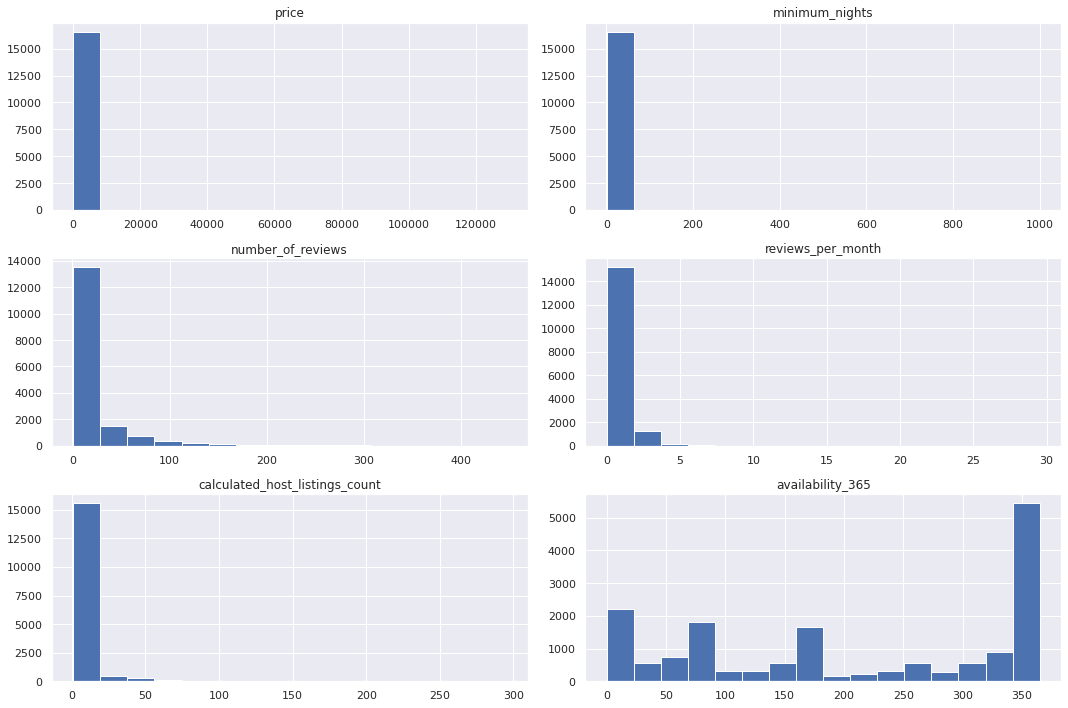

In [50]:
g = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].hist(bins="sturges", figsize=(15,10))
plt.tight_layout()
plt.show()

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

- Resumo estatístico por meio do método describe()
- Plotar boxplots para a variável.

In [12]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,16640.000000,16640.000000,16640.000000,16640.000000,16640.000000,16640.000000
mean,461.007873,3.779627,19.416466,0.629180,5.851022,210.022656
std,2663.120893,16.428251,35.660673,0.875921,18.180373,137.922053
min,33.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,145.000000,2.000000,2.000000,0.090000,1.000000,85.000000
50%,231.000000,2.000000,6.000000,0.270000,2.000000,204.000000
75%,400.000000,3.000000,19.000000,0.850000,3.000000,360.000000
max,129080.000000,1000.000000,446.000000,29.530000,295.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

- A variável price possui 75% do valor abaixo de 550, porém seu valor máximo é 625216.
- A quantidade mínima de noites (minimum_nights) está acima do limite real de 365 dias no ano

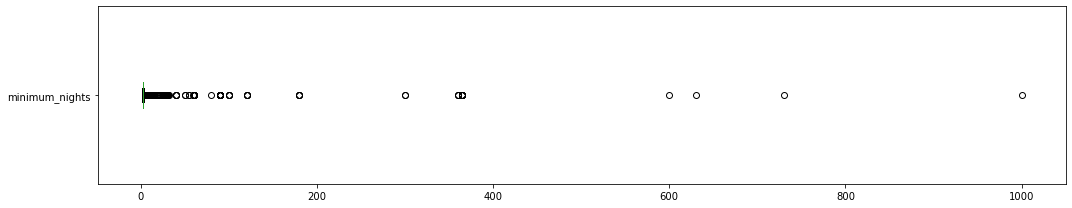

minimum_nights: valores acima de 30:
263 entradas
1.5805%


In [13]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.tight_layout()
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 15])))
print("{:.4f}%".format((len(df[df.minimum_nights > 15]) / df.shape[0])*100))

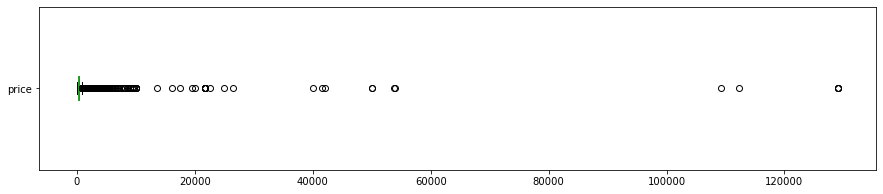


price: valores acima de 1500
558 entradas
3.3534%


In [14]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1400])))
print("{:.4f}%".format((len(df[df.price > 1400]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1400), figsize=(15,3));

In [15]:
# remover os *outliers* em um novo DataFrame só com as variáveis númericas
df_clean = df.copy()[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']]

df_clean = df_clean[(np.abs(stats.zscore(df_clean)) < 3).all(axis=1)] 

In [16]:
df_clean.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,15795.000000,15795.000000,15795.000000,15795.000000,15795.000000,15795.000000
mean,374.183349,3.105920,15.099335,0.524419,4.762077,210.836910
std,504.955291,3.417545,22.709828,0.623065,9.346752,138.505087
min,39.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,146.000000,2.000000,2.000000,0.080000,1.000000,85.500000
50%,235.000000,2.000000,5.000000,0.250000,1.000000,206.000000
75%,400.000000,3.000000,17.000000,0.740000,3.000000,361.000000
max,8182.000000,50.000000,126.000000,3.250000,59.000000,365.000000


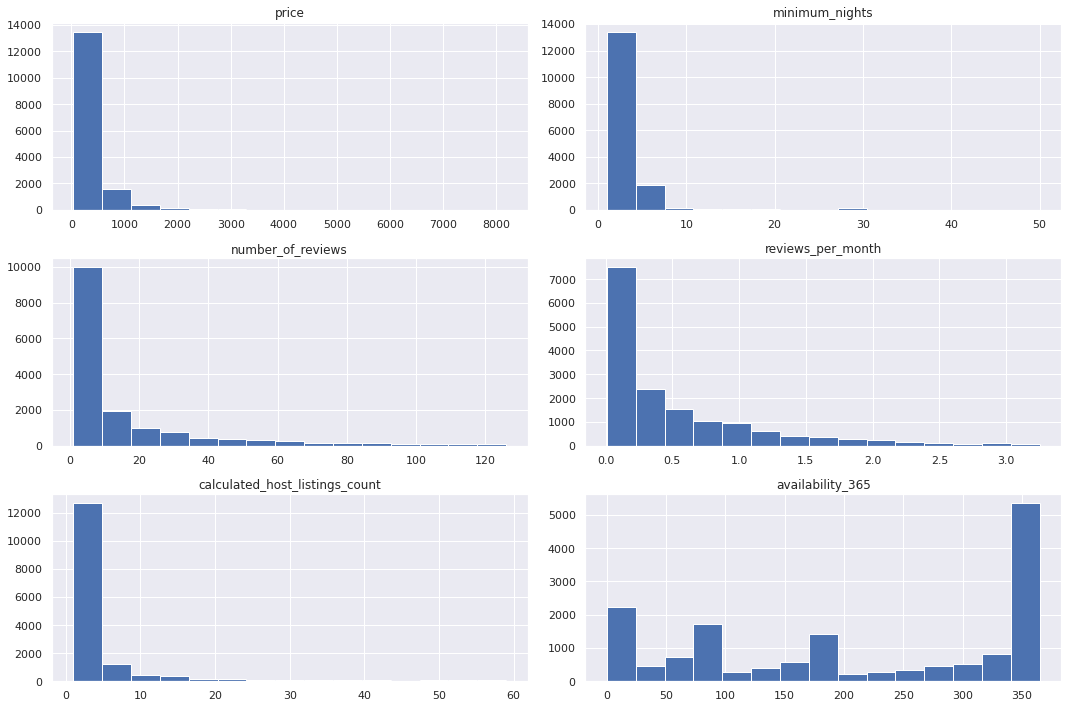

In [51]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins="sturges", figsize=(15,10))
plt.tight_layout()
plt.show()

Observe qua a visualização já melhorou um pouco.

![](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# **Visualização de Dados**

## Visualização de variáveis Qualitativas e Quantitativas Discretas com menos de 6 valores distintos

<hr>

In [18]:
quantidade_por_bairro = df["neighbourhood"].value_counts()
quantidade_por_bairro

Copacabana             5374
Ipanema                1784
Barra da Tijuca        1636
Botafogo                861
Leblon                  831
                       ... 
Deodoro                   1
Engenho da Rainha         1
Bancários                 1
Vicente de Carvalho       1
Gericinó                  1
Name: neighbourhood, Length: 133, dtype: int64

### Gráfico de Barras

Temos muitos bairros no Rio de Janeiro que possuem pouco imóveis no AirBnB, com o objetivo de melhorar a visualização, vamos plotar apenas dos 10 bairros com mais imóveis

In [19]:
bairros_mais_imoveis = quantidade_por_bairro[:10]
bairros_mais_imoveis

Copacabana                  5374
Ipanema                     1784
Barra da Tijuca             1636
Botafogo                     861
Leblon                       831
Jacarepaguá                  726
Recreio dos Bandeirantes     647
Santa Teresa                 588
Centro                       502
Flamengo                     422
Name: neighbourhood, dtype: int64

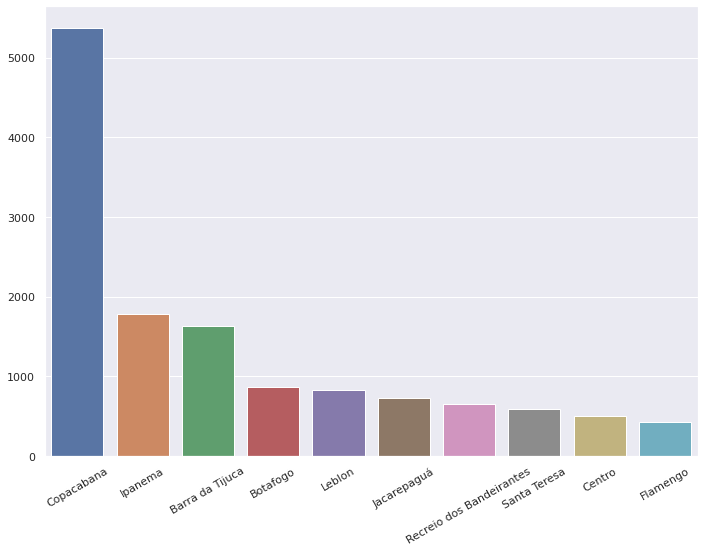

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x=bairros_mais_imoveis.index, y=bairros_mais_imoveis.values)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30)

O bairro que mais possui imóveis no AirBnB no Rio de Janeiro é o de Copacabana, seguido por Barra da Tijuca e Ipanema com cerca 2500 imóveis

### Gráfico de Setores

In [21]:
qtd_tipos_quarto = df["room_type"].value_counts()
qtd_tipos_quarto

Entire home/apt    12431
Private room        3862
Shared room          273
Hotel room            74
Name: room_type, dtype: int64

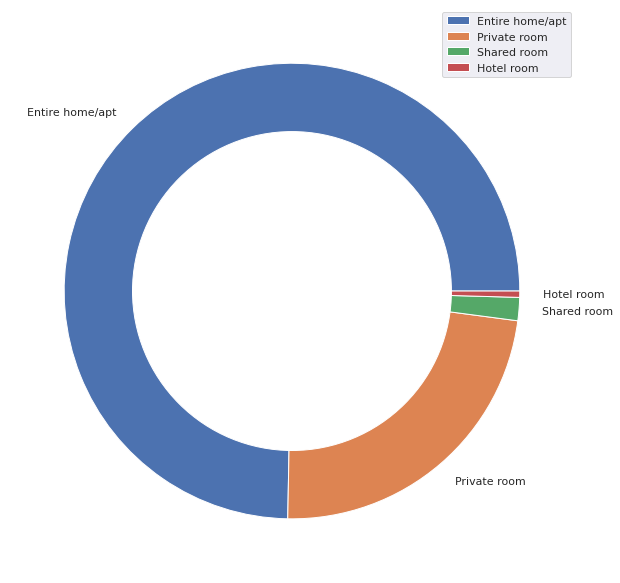

In [22]:
wedges, texts  = plt.pie(qtd_tipos_quarto, labels=qtd_tipos_quarto.index)
circulo=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circulo)

plt.legend(wedges, qtd_tipos_quarto.index)
plt.tight_layout()

plt.show()

## Visualização de variáveis Quantitativas Contínuas
<hr>

### Histogramas

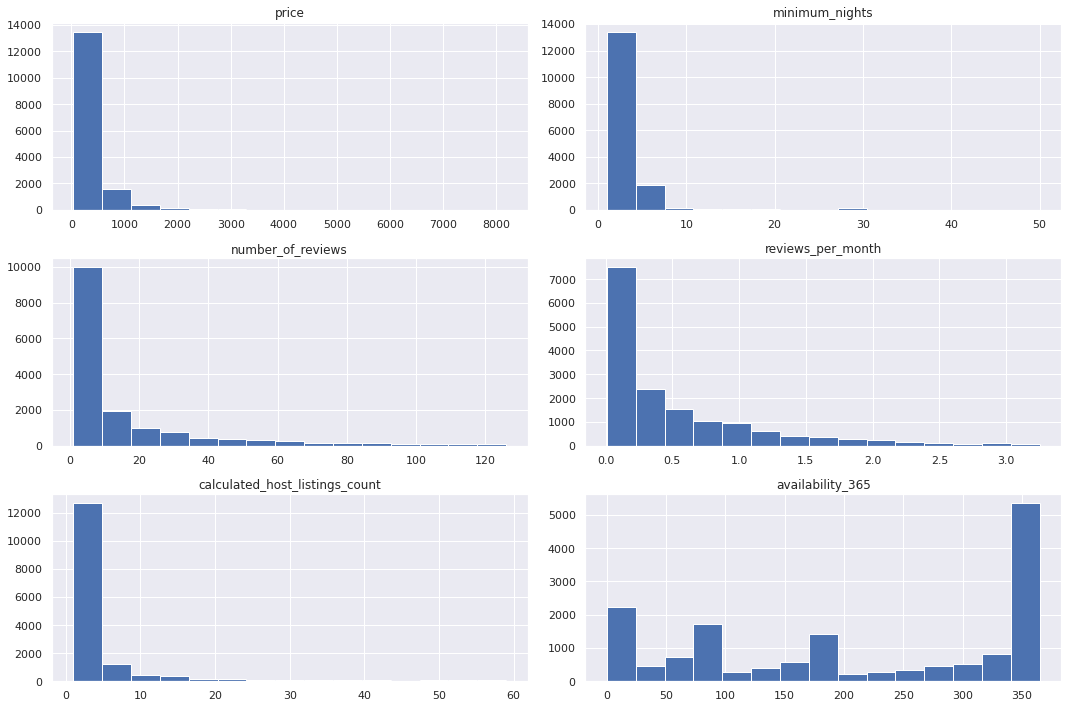

In [23]:
df_clean.hist(bins="sturges", figsize=(15,10))
plt.tight_layout()
plt.show()

![](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# **Estatística Descritiva**
   - Organiza, resume e descreve os dados;
   - Organiza e resume através de tabelas de frequência e gráficos;
   - Descreve os dados usando 3 tipos de medidas: Medidas de posição, medidas de dispersão e medidas de comparação;
   - Medidas de Posição: Média, mediana e moda;
   - Medidas de Dispersão: Amplitude, quartil, variância, desvio padrão, etc;
   - Medidas de Comparação: Covariância, correlação e escore padrão;

![](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## **Medidas de Posição**
- Localizar a maior concentração de valores de uma distribuição;
- Sintetizar o comportamento do conjunto do qual ele é originário;
- Possibilitar comparações entre séries de dados;
- Medidas: Média, Mediana e Moda

<hr>

### Média
- Centro da distribuição;
- Vantagem: Reflete todos os valores;
- Desvantagem: É afetada por valores extremos (Outliers)

<center>
    
<img src="https://i.imgur.com/hS4mS2w.png" >
    
<center />

- Modo Pythônico:

In [24]:
df_clean["price"].mean()

374.18334916112696

<hr>

### Mediana
- Divide a distribuição ao meio em partes iguais (Separatriz)
- Vantagem: Menos sensível a valores extremos (Outliers)
- Desvantagem: Difícil determinar para grande quantidades de dados

$$
Q_2 = 
\begin{cases}
x_{\left(\frac{n+1}{2}\right)}, & \text{se } n \text{ é ímpar}\\[2mm]
\dfrac{x_{\left(\frac{n}{2}\right)} + x_{\left(\frac{n}{2}+1\right)}}{2}, & \text{se } n \text{ é par}
\end{cases}
$$

** considere n igual ao número de observações e que os valores estão ordenados

- Modo Pythônico:

In [25]:
df_clean["price"].median()

235.0

<hr>

### Moda
- Valor maios frequente;
- Vantagem: Valor típico;
- Desvantagem: Não é utilizado em análises matemáticas;
<br>

- Termos:
    - Amodal: Não existe valor predominante;
    - Unimodal: Uma moda;
    - Bimodal: Duas modas;
    - Multimodal: Com vários modas;

<br>

- Moda em dados com classes:
<br>

<center>
<img src="https://i.imgur.com/G2Czlvb.png" >
<center />

    

- Modo Pythônico:

In [26]:
df["neighbourhood"].mode()

0    Copacabana
dtype: object

![](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## **Medidas de Dispersão**
- Medem o grau de variabilidade (dispersão) dos valores observados em torno da média aritmética;
- Caracterizam a representividade da média e o nível de homogeneidade ou heterogeneidade dentro de cada grupo;

<hr>

### Amplitude Total (A)
- Diferença entre maior e o menor da série;
- Não considera a dispersão dos valores internos;
- Utilização limitada enquanto medida de dispersão;

<center>
<img src="https://i.imgur.com/D0hnOy4.png" >
<center>

- Modo Pythônico:

In [27]:
Xmax = df_clean["price"].max()
Xmin = df_clean["price"].min()
A = Xmax - Xmin
A

8143

<hr>

### Variância (S²)
- Leva em consideração os valores extremos e também os valores intermediários;
- Relaciona os desvios em torno da média;
- Média aritmética dos quadrados dos desvios
- Númer em unidade "quadrada", fato que pode se tornar desvantagem;
- Maior dificuldade de compreensão e menor utilidade na estatística descritiva;
- Extremamente relevante na inferência estatística e em combinações de amostras;

<br>

<center>
<img src="https://i.imgur.com/dVDVYMC.png" >
<br>
<img src="https://i.imgur.com/ZhpRrp9.png" >
<center />

- **Modo Pythônico**:
    - Variância da População

In [28]:
df_clean["price"].var(ddof=0)

254963.70250212488

    - Variância da Amostra:

In [29]:
df_clean["price"].var(ddof=1)

254979.8455756023

<hr>

### Desvio Padrão (S)
- Mais usado na comparação de diferenças entre conjuntos de dados;
- Determina a dispersão dos valores em relação a média;

<center>
<img src="https://i.imgur.com/R73K8sS.png" >
<center />

- Modo Pythônico:
 - Desvio Padrão da População

In [30]:
df_clean["price"].std(ddof=0)

504.93930576072694

- Desvio Padrão da Amostra

In [31]:
df_clean["price"].std(ddof=1)

504.9552906699783

<hr>

### Coeficiente de Variação (CV)
- Medida relativa de dispersão;
- Útil para a comparação em termos relativos do grau de concentração;

<center>
<img src="https://i.imgur.com/LiXC1C2.png" >
<center />


- Diz-se que uma distribuição:
    - **Baixa Dispersão**: CV <= 15%
    - **Média Dispersão**: 15% < CV < 30%
    - **Alta Dispersão**: CV >= 30%

- Modo Pythônico:

In [32]:
from scipy.stats import variation
variation(df_clean["price"])

1.3494435465734222

<hr>

### Assimetria
- Referem-se à forma da curva de uma distribuição de frequência (histograma);
- Denomina-se assimetria o grau de afastamento de uma distribuição da unidade de simetria;
- O quão simétrica é a distribuição dos dados em torno da média;

<center>
<img src="https://miro.medium.com/max/600/1*9451kH1-GPqdNyWdehmPeQ.jpeg">
<center/>

- Grau de Assimetria:
    - Fórmula :
    
        ![](https://i.imgur.com/pH0bjzi.png)
        
    - **AS = 0:** Distribuição é simétrica;
    - **AS > 0:** Distribuição Assimétrica Positiva (à direita)
    - **AS < 0:** Distribuição Assimétrica Negativa (à esquerda)
    
    
- Anotações Importantes:
 - Se a assimetria estiver entre -0,5 e 0,5, os dados são bastante simétricos
 - Se a assimetria estiver entre -1 e -0,5 ou entre 0,5 e 1, os dados estão moderadamente inclinados
 - Se a assimetria for menor que -1 ou maior que 1, os dados estão altamente enviesados

- Modo Pythônico:

In [33]:
from scipy.stats import skew
skew(df_clean["number_of_reviews"], bias=False)

2.4415704669564837

In [34]:
df_clean["number_of_reviews"].skew()

2.441570466956483

<hr>

### Curtose
- Grau de achatamento (ou afilamento) de uma curva normal (simétrica)

<center>
Coeficiente Percentílico de Curtose
<br><br>
<img src="https://i.imgur.com/tRv7VDe.png" >
<center/>

- Coeficiente Percentílico de Curtose:
    - **Mesocúrtica:** Curva básica de referência (Curva padrão ou normal) => C = 0.263
    - **Platicúrtica:** Curva mais achatada (ou mais aberta) que a curva normal => C > 0.263
    - **Leptocúrtica:** Curva mais afilada que a curva normal => C < 0.263

<center>
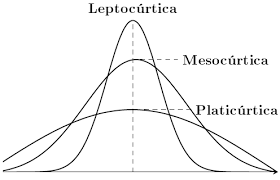
<center/>

- Anotações Importantes:
    - Junto com a assimetria, a curtose é uma estatística descritiva importante da distribuição de dados. No entanto, os dois conceitos não devem ser confundidos. A assimetria mede essencialmente a simetria da distribuição, enquanto a curtose determina o peso das caudas da distribuição.
    - É a nitidez do pico de uma curva de distribuição de frequência. Na verdade, é a medida dos outliers presentes na distribuição.
    - Alta curtose em um conjunto de dados é um indicador de que os dados têm outliers pesados.
    - Baixa curtose em um conjunto de dados é um indicador de que os dados não apresentam valores discrepantes.
    - Se o valor de curtose + significa pontudo e - significa plano.

- Modo Pythônico:

In [35]:
C = (np.quantile(df_clean["price"], 0.75)-np.quantile(df_clean["price"], 0.25))/(2*(np.percentile(df_clean["price"], 90)-np.percentile(df_clean["price"], 10)))
C

0.19418960244648317

No Python, as bibliotecas calculam através do coeficiente de curtose de Fisher, dado pela fórmula:<br><br>
![](https://i.imgur.com/CjY2FPh.png)
- **Mesocúrtica:** C = 0
- **Platicúrtica:** C > 0
- **Leptocúrtica:** C < 0

In [36]:
from scipy.stats import kurtosis
kurtosis(df_clean["price"])

55.444133835229295

In [37]:
df["price"].kurtosis()

1706.9207948031485

<hr>

### Percentil
- Medida que divide a amostra em 100 partes, cada uma com uma porcentagem de dados aproximadamente igual;
- Décimo Percentil = 10% dos dados (menores dados) ordenados (P10)

<center>
Fórmula para encontra a posição do Percentil:
<br><br>
<img src="https://i.imgur.com/tcpB3n4.png" > 
<center/>


- Modo Pythônico:

In [38]:
P50 = np.percentile(df_clean["price"], 50)
P50

235.0

<hr>

### Quartil
- Medida que divide a amostra em 4 partes, cada uma com uma porcentagem de dados aproximadamente igual;
- Primeiro Quartil = 25% dos dados (menores dados) ordenados (Q1)
- Segundo Quartil = 50% dos dados (menores dados) ordenados (Q2)
- Terceiro Quartil = 75% dos dados (menores dados) ordenados (Q3)


<center>
Fórmula para encontra a posição do Quartil:
<br><br>
<img src="https://i.imgur.com/ADxWRCh.png" > 
<center/>


- Modo Pythônico:

In [39]:
#primeiro quartil = 25% = 0.25
np.quantile(df_clean["price"], 0.25)

146.0

In [40]:
#segundo quartil = 50% = 0.50
df_clean["price"].quantile(0.5)

235.0

<hr>

### Gráfico Boxplot ou Diagrama de Caixa
- O boxplot nos fornece uma análise visual da posição, dispersão, simetria, caudas e valores discrepantes (outliers) do conjunto de dados. 

<center>
<img src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png">
<center/>

/home/lucas/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


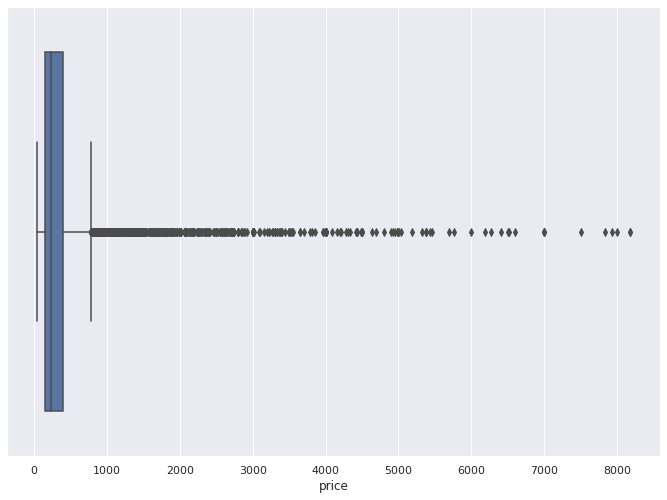

In [41]:
g = sns.boxplot(df_clean["price"])

![](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## **Medidas de Comparação**

   - São medidas que fornecem informações que permitem comparar duas ou mais variáveis a partir de medidas diretas ou indiretas de ponderação e/ou de relação. São medidas de comparação o coeficiente de variação, o escore padronizado e a correlação.

<hr>

### Covariância
   - Como as variáveis estão variando em conjunto;
   - Afetada pelas unidades de medida;
   - Mede a intensidade da relação linear entre as variáveis;
   - A magnitude do valor depende das unidades das variáveis;

- Covariância Populacional:<br>
<img src="https://iceb.ssdi.di.fct.unl.pt/1314/b/images/covariancia.png">
<br><br>
- Covariância Amostral:<br>
<img src="https://lh3.googleusercontent.com/proxy/qhi7VMXFcWghsQlZImEeGKhQt47GAzEeTdLjqyQXRwftPWVhv-zYo9Ir1w6KIX7kqjjGNlRpxwuYfLsuDdCSOnL22ba-cdgh1XoWAB9OgcU_WBJQu5J5" >
<br><br>
- Se quanto maior X, maior Y, então a covariância é positiva;
- Se quanto maior X, menor Y, então a covariância é negativa;


- Modo Pythônico:  

In [42]:
df_clean[["calculated_host_listings_count", "availability_365"]].cov()

,calculated_host_listings_count,availability_365
calculated_host_listings_count,87.361776,55.703629
availability_365,55.703629,19183.659104


<hr>

### Correlação
   - Medida para a variabilidade conjunta entre duas variáveis;
   - Princial vantagem: Relativa e padronizada - varia entre [-1, 1]
   - Pode ser que as variáveis tenham relações (quadráticas, etc), porém essa correlação só irá identificar correlação linear;
   - Cuidado: Correlação linear e covariância não implicam em causalidade;
   - Gráficos para visualizar a correlação entre as variáveis: Dispersão e Mapa de Calor;

<center>
Fórmula da Correlação (Pearson):
<br><br>
    
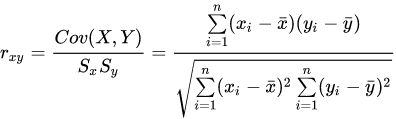
<center/>

- Intensidade:
    - **Correlação Forte:** corr > 0.7
    - **Correlação Moderada:** 0.4 <= corr <= 0.7
    - **Correlação Fraca:** corr < 0.4


<center>
<img width="80%" src="https://d33wubrfki0l68.cloudfront.net/e3b158e0207e1a80248bc0d7283f6eee638d5e72/4f6f0/blog/correlacao_files/figure-html/unnamed-chunk-4-1.png">
<center/>

- Outras Correlações:
   - Correlação de Spearman (Apesar de não ser afetada por outliers, possui limitações);
   - Correlação de Kendall;

- Modo Pythônico: 

OBS: O Pandas utiliza a correlação de Pearson para calcular

In [43]:
df_clean[["calculated_host_listings_count", "availability_365"]].corr()

,calculated_host_listings_count,availability_365
calculated_host_listings_count,1.000000,0.043029
availability_365,0.043029,1.000000


In [44]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df_clean["calculated_host_listings_count"], df_clean["availability_365"])
corr

0.04302858215853843

Outras Correlações em Python:

In [45]:
from scipy.stats import spearmanr
spearmanr(df_clean["calculated_host_listings_count"], df_clean["availability_365"])

SpearmanrResult(correlation=0.04774504172008268, pvalue=1.93159023290978e-09)

In [46]:
from scipy.stats import kendalltau
kendalltau(df_clean["calculated_host_listings_count"], df_clean["availability_365"])

KendalltauResult(correlation=0.03565249199735385, pvalue=2.3450611996399363e-09)

### **Visualizando correlação com mapa de calor**

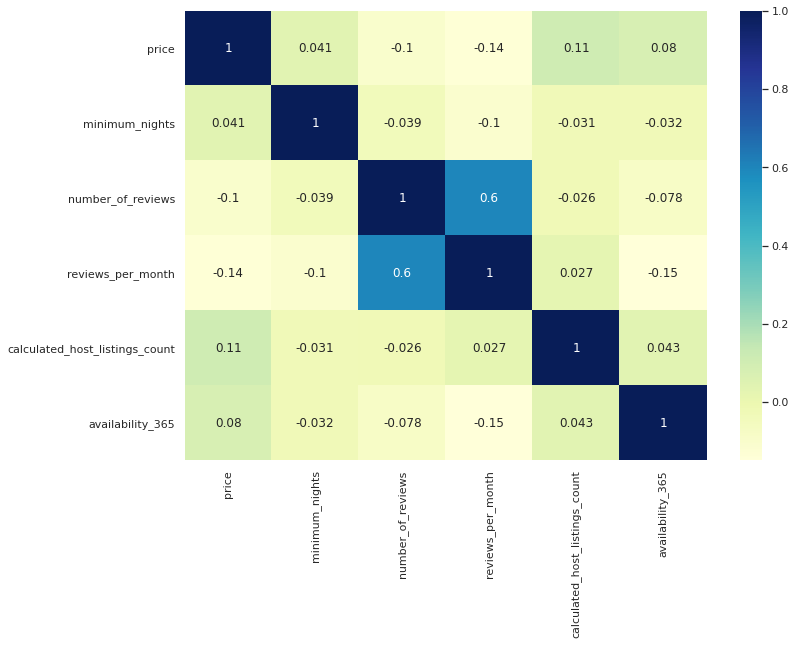

In [47]:
ax = sns.heatmap(df_clean.corr(), annot=True, cmap="YlGnBu")

<hr>

### Correlação vs Causalidade

Na grande maioria dos casos, uma correlação forte entre duas variáveis não implica que há uma relação de causa-efeito entre elas. Por exemplo, se você achou uma correlação positiva e forte entre X e Y, isso não lhe permitirá concluir que, se X aumentar, então Y também crescerá. Há potencialmente outro fator Z que puxa tanto X quanto Y. Daí você encontra uma correlação positiva nos dados, mas não necessariamente pelo efeito de X em Y, mas possivelmente pelo efeito de Z nas duas variáveis.

Nossas pensamentos nos levam a concluir erroneamente que fatos correlacionados possuem relação de causalidade mesmo quando não há uma evidência para isso, o que acaba por empobrecer muitos debates, tornando-os rasos. Um outro exemplo, bem desconexo, seria: alguém tenta te convencer que o número de pessoas afogadas em piscinas é causa das aparições do Nicolas Cage em filmes (imagem abaixo). Você deveria acreditar? Saiba que esses dois eventos estiveram correlacionados (estatísticamente falando) durante certo período, mas obviamente não possuem relação de causa. Fatos como esse, por exemplo, que não apresentam nenhuma relação, muito menos de causa direta ou indireta, acontecem por “força do acaso” e são denominados correlações espúrias e, apesar de óbvios, também ilustram muito bem o argumento de que Correlação não implica em Causalidade.

<center>
<img src="https://miro.medium.com/max/653/1*6xheQbkHn38R6zbzTUq4wA.png">
<center />

Para mais exemplos de correlações que não indicam causalidade, acesse:<br>
http://www.tylervigen.com/spurious-correlations

<hr>

### Escore Padrão (Escore-Z)
   - Na estatística, um escore-z (ou escore padrão) de uma observação é o número de desvios padrão acima ou abaixo da média da população; 
   - Para calcular um escore z, é necessário saber a média da população e o desvio padrão da população;

<center>
<img width="60%" src="https://i.imgur.com/GHjLlPK.png">
<center>

- Modo Pythônico:

In [48]:
from scipy.stats import zscore
#populacao
zscore(df_clean["price"], ddof=0)

array([-0.13305233,  0.21748485,  2.72669732, ..., -0.44398078,
       -0.2855459 , -0.56280695])

In [49]:
#amostra
zscore(df_clean["price"], ddof=1)

array([-0.13304811,  0.21747797,  2.726611  , ..., -0.44396673,
       -0.28553686, -0.56278913])

![](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)